# PHP 1880 Stress Survey

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### Clean and Reverse Code

In [2]:
survey = pd.read_csv("survey_2022.csv", header=[1])

In [3]:
survey.drop("end.comments", axis=1, inplace=True)

In [4]:
survey["email"] = survey["email"].str.lower()

In [5]:
survey.head()

,StartDate,EndDate,Timepoint,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,...,FF1_31,FF1_32,FF1_33,FF1_34,FF1_35,FF1_36,FF1_37,FF1_38,FF1_39,NPS_1
0,9/12/22 11:35,9/12/22 11:41,pre,0,100,373,1,9/12/22 11:41,R_3lVmxt3snoB8yRq,anonymous,...,5,5,3,3,3,5,4,5,3,NaN
1,9/12/22 11:36,9/12/22 11:42,pre,0,100,369,1,9/12/22 11:42,R_qJ9CumQzcRiA825,anonymous,...,2,2,4,4,4,2,2,3,2,NaN
2,9/12/22 11:35,9/12/22 11:42,pre,0,100,424,1,9/12/22 11:42,R_1o1jMQm6j23Frof,anonymous,...,5,4,4,2,1,5,4,2,1,NaN
3,9/12/22 11:36,9/12/22 11:46,pre,0,100,585,1,9/12/22 11:46,R_3qwgX4ig3QLWIiC,anonymous,...,4,3,3,2,2,4,2,3,3,NaN
4,9/12/22 11:43,9/12/22 11:47,pre,0,100,244,1,9/12/22 11:47,R_1dvlD9W2XDVonU7,anonymous,...,4,1,2,4,4,3,2,4,4,NaN


In [6]:
# PSS Reverse Score Items 4, 5, 6, 7, 9, 10, 13

pss_reverse = ["PS1_4", "PS1_5", "PS1_6", "PS1_7", "PS1_9", "PS1_10", "PS1_13"]

survey[pss_reverse] = survey[pss_reverse].replace({0: 4, 1: 3, 2: 2, 3: 1, 4: 0})

In [7]:
# FFMQ Reverse Score Items 3, 5, 8, 10, 12, 13, 14, 16, 17, 18, 22, 23, 25, 28, 30, 34, 35, 38, 39

ffmq_reverse = [
    "FF1_3",
    "FF1_5",
    "FF1_8",
    "FF1_10",
    "FF1_12",
    "FF1_13",
    "FF1_14",
    "FF1_16",
    "FF1_17",
    "FF1_18",
    "FF1_22",
    "FF1_23",
    "FF1_25",
    "FF1_28",
    "FF1_30",
    "FF1_34",
    "FF1_35",
    "FF1_38",
    "FF1_39",
]


survey[ffmq_reverse] = survey[ffmq_reverse].replace({1: 5, 2: 4, 3: 3, 4: 2, 5: 1})

In [8]:
pss_filter = [col for col in survey if col.startswith("PS1")]
ffmq_filter = [col for col in survey if col.startswith("FF1")]

### Split Pre/Post Survey and Run Analysis

In [9]:
pre = survey.loc[survey.Timepoint == "pre"]
post = survey.loc[survey.Timepoint == "post"]

In [10]:
pre = pre.loc[pre.email.isin(post.email)]
post = post.loc[post.email.isin(pre.email)]

In [11]:
pre["PSS Total"] = pre[pss_filter].sum(axis=1)

post["PSS Total"] = post[pss_filter].sum(axis=1)

In [12]:
pre["FFMQ Total"] = pre[ffmq_filter].sum(axis=1)

post["FFMQ Total"] = post[ffmq_filter].sum(axis=1)

In [13]:
ffmq_observing = {
    "FF1_1",
    "FF1_6",
    "FF1_11",
    "FF1_15",
    "FF1_20",
    "FF1_26",
    "FF1_31",
    "FF1_36",
}

ffmq_describing = {
    "FF1_2",
    "FF1_7",
    "FF1_12",
    "FF1_16",
    "FF1_22",
    "FF1_27",
    "FF1_32",
    "FF1_37",
}

ffmq_acting = {
    "FF1_5",
    "FF1_8",
    "FF1_13",
    "FF1_18",
    "FF1_23",
    "FF1_28",
    "FF1_34",
    "FF1_38",
}

ffmq_nonjudging = {
    "FF1_3",
    "FF1_10",
    "FF1_14",
    "FF1_17",
    "FF1_25",
    "FF1_30",
    "FF1_35",
    "FF1_39",
}

ffmq_nonreactivity = {
    "FF1_4",
    "FF1_9",
    "FF1_19",
    "FF1_21",
    "FF1_24",
    "FF1_29",
    "FF1_33",
}

pre["FFMQ Total Observing"] = pre[ffmq_observing].sum(axis=1)
pre["FFMQ Total Describing"] = pre[ffmq_describing].sum(axis=1)
pre["FFMQ Total Acting"] = pre[ffmq_acting].sum(axis=1)
pre["FFMQ Total Nonjudging"] = pre[ffmq_nonjudging].sum(axis=1)
pre["FFMQ Total Nonreactivity"] = pre[ffmq_nonreactivity].sum(axis=1)

post["FFMQ Total Observing"] = post[ffmq_observing].sum(axis=1)
post["FFMQ Total Describing"] = post[ffmq_describing].sum(axis=1)
post["FFMQ Total Acting"] = post[ffmq_acting].sum(axis=1)
post["FFMQ Total Nonjudging"] = post[ffmq_nonjudging].sum(axis=1)
post["FFMQ Total Nonreactivity"] = post[ffmq_nonreactivity].sum(axis=1)

In [14]:
# PSS T Test

pss_stat = stats.ttest_rel(pre["PSS Total"], post["PSS Total"])
pss_stat

Ttest_relResult(statistic=1.1786499382844466, pvalue=0.24586553732007427)

In [15]:
# PSS Pre Descriptive

pre["PSS Total"].describe()

count    39.000000
mean     24.128205
std       7.664613
min       4.000000
25%      19.000000
50%      24.000000
75%      27.500000
max      42.000000
Name: PSS Total, dtype: float64

In [16]:
# PSS Post Descriptive

post["PSS Total"].describe()

count    39.000000
mean     21.871795
std       8.721358
min       3.000000
25%      16.500000
50%      22.000000
75%      27.000000
max      42.000000
Name: PSS Total, dtype: float64

In [17]:
# FFMQ T Test

ffmq_stat = stats.ttest_rel(pre["FFMQ Total"], post["FFMQ Total"])
ffmq_stat

Ttest_relResult(statistic=-3.2816918134530333, pvalue=0.0022172566349450574)

In [18]:
# FFMQ Pre Descriptive

pre["FFMQ Total"].describe()

count     39.000000
mean     122.717949
std       17.288494
min       85.000000
25%      114.000000
50%      122.000000
75%      129.500000
max      161.000000
Name: FFMQ Total, dtype: float64

In [19]:
# FFMQ Post Descriptive

post["FFMQ Total"].describe()

count     39.000000
mean     136.435897
std       18.171399
min      100.000000
25%      121.500000
50%      139.000000
75%      150.000000
max      171.000000
Name: FFMQ Total, dtype: float64

In [20]:
# FFMQ T Test Observing

ffmq_observing_stat = stats.ttest_rel(
    pre["FFMQ Total Observing"], post["FFMQ Total Observing"]
)
ffmq_observing_stat

Ttest_relResult(statistic=-2.2887738005904352, pvalue=0.027741587802051687)

In [21]:
# FFMQ T Test Describing

ffmq_describing_stat = stats.ttest_rel(
    pre["FFMQ Total Describing"], post["FFMQ Total Describing"]
)
ffmq_describing_stat

Ttest_relResult(statistic=-1.8077378701782891, pvalue=0.07856799790307371)

In [22]:
# FFMQ T Test Acting

ffmq_acting_stat = stats.ttest_rel(pre["FFMQ Total Acting"], post["FFMQ Total Acting"])
ffmq_acting_stat

Ttest_relResult(statistic=-2.0485900789263356, pvalue=0.04745536910051016)

In [23]:
# FFMQ T Test Nonjudging

ffmq_nonjudging_stat = stats.ttest_rel(
    pre["FFMQ Total Nonjudging"], post["FFMQ Total Nonjudging"]
)
ffmq_nonjudging_stat

Ttest_relResult(statistic=-1.9792381404455939, pvalue=0.05506818213758153)

In [24]:
# FFMQ T Test Nonreactivity

ffmq_nonreactivity_stat = stats.ttest_rel(
    pre["FFMQ Total Nonreactivity"], post["FFMQ Total Nonreactivity"]
)
ffmq_nonreactivity_stat

Ttest_relResult(statistic=-3.029081432369017, pvalue=0.004394030429085912)

In [25]:
pre.NPS_1 = pre.NPS_1.round()
post.NPS_1 = post.NPS_1.round()

In [26]:
nps_dict = {range(9, 11): "Promoters", range(0, 7): "Detractors"}

In [27]:
nps_pre_defined = pre.replace({"NPS_1": nps_dict})
nps_post_defined = post.replace({"NPS_1": nps_dict})

In [28]:
# NPS Pre Test

# ((nps_pre_defined.NPS_1.str.count('Promoter').sum()/nps_post_defined.NPS_1.count())*100) - ((nps_pre_defined.NPS_1.str.count('Detractor').sum()/nps_post_defined.NPS_1.count())*100)

In [29]:
# NPS Post Test

(
    (
        nps_post_defined.NPS_1.str.count("Promoter").sum()
        / nps_post_defined.NPS_1.count()
    )
    * 100
) - (
    (
        nps_post_defined.NPS_1.str.count("Detractor").sum()
        / nps_post_defined.NPS_1.count()
    )
    * 100
)

10.256410256410263

In [30]:
# NPS Pre Values

nps_pre_defined["NPS_1"].value_counts()

Series([], Name: NPS_1, dtype: int64)

In [31]:
# NPS Post Values

nps_post_defined["NPS_1"].value_counts()

Promoters     17
Detractors    13
8.0            5
7.0            4
Name: NPS_1, dtype: int64

In [32]:
total = pre.append(post, ignore_index=True)

### PSS Summary

In [33]:
pss_total = pd.melt(total, id_vars="timepoint", value_vars="PSS Total")

In [34]:
pss_total_grouped = pss_total.groupby("timepoint", sort=False).mean().reset_index()

In [35]:
pss_total_grouped

,timepoint,value
0,1,24.128205
1,2,21.871795


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_79594/1029219241.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0.8, 0, ''),
 Text(1.0, 0, 'Baseline 2022'),
 Text(1.2000000000000002, 0, ''),
 Text(1.4000000000000001, 0, ''),
 Text(1.6, 0, ''),
 Text(1.8, 0, ''),
 Text(2.0, 0, 'Follow-Up 2022'),
 Text(2.2, 0, '')]

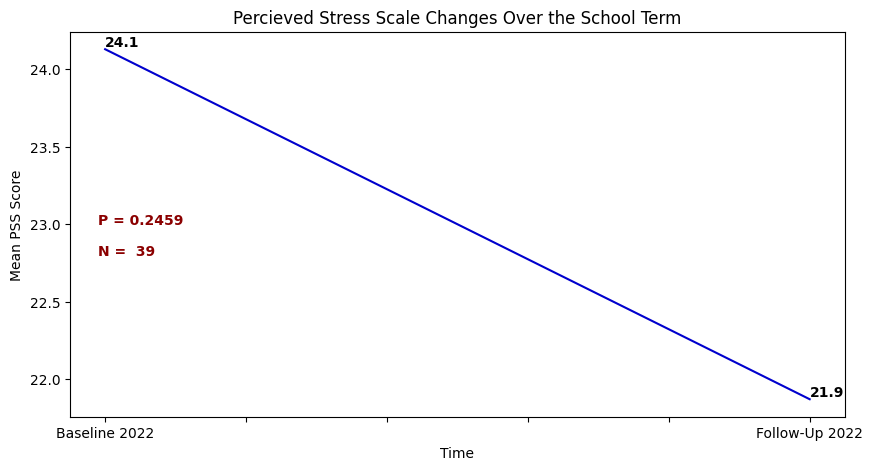

In [36]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=pss_total_grouped, x="timepoint", y="value", ci=None, color="mediumblue"
)
ax.set(xlabel="Time", ylabel="Mean PSS Score")
ax.set(title="Percieved Stress Scale Changes Over the School Term")


for x, y in zip(pss_total_grouped["timepoint"], pss_total_grouped["value"]):
    plt.text(
        x=x, y=y + 0.02, s="{:.1f}".format(y), color="black", weight="semibold"
    )  # .set_backgroundcolor('lightblue')

plt.text(
    1 - 0.01,
    23,
    "P = %3.4f" % pss_stat.pvalue,
    horizontalalignment="left",
    size="medium",
    color="darkred",
    weight="semibold",
)
plt.text(
    1 - 0.01,
    22.8,
    "N = %3.0f" % len(pre.index),
    horizontalalignment="left",
    size="medium",
    color="darkred",
    weight="semibold",
)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = "Baseline 2022"
labels[6] = "Follow-Up 2022"

ax.set_xticklabels(labels)

### FFMQ Summary

In [37]:
ffmq_total = pd.melt(total, id_vars="timepoint", value_vars="FFMQ Total")

In [38]:
ffmq_total_grouped = ffmq_total.groupby("timepoint", sort=False).mean().reset_index()

In [39]:
ffmq_total_grouped

,timepoint,value
0,1,122.717949
1,2,136.435897


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_79594/3794021242.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0.8, 0, ''),
 Text(1.0, 0, 'Baseline 2022'),
 Text(1.2000000000000002, 0, ''),
 Text(1.4000000000000001, 0, ''),
 Text(1.6, 0, ''),
 Text(1.8, 0, ''),
 Text(2.0, 0, 'Follow-Up 2022'),
 Text(2.2, 0, '')]

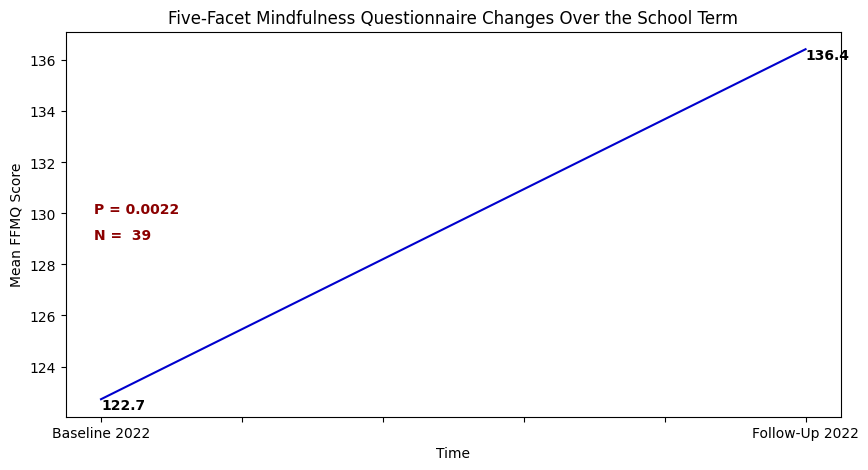

In [40]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=ffmq_total_grouped, x="timepoint", y="value", ci=None, color="mediumblue"
)
ax.set(xlabel="Time", ylabel="Mean FFMQ Score")
ax.set(title="Five-Facet Mindfulness Questionnaire Changes Over the School Term")


for x, y in zip(ffmq_total_grouped["timepoint"], ffmq_total_grouped["value"]):
    plt.text(
        x=x, y=y - 0.4, s="{:.1f}".format(y), color="black", weight="semibold"
    )  # .set_backgroundcolor('lightblue')

plt.text(
    1 - 0.01,
    130,
    "P = %3.4f" % ffmq_stat.pvalue,
    horizontalalignment="left",
    size="medium",
    color="darkred",
    weight="semibold",
)
plt.text(
    1 - 0.01,
    129,
    "N = %3.0f" % len(pre.index),
    horizontalalignment="left",
    size="medium",
    color="darkred",
    weight="semibold",
)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = "Baseline 2022"
labels[6] = "Follow-Up 2022"

ax.set_xticklabels(labels)

### FFMQ Observing

In [41]:
ffmq_observing = pd.melt(total, id_vars="timepoint", value_vars="FFMQ Total Observing")

In [42]:
ffmq_observing_grouped = (
    ffmq_observing.groupby("timepoint", sort=False).mean().reset_index()
)

In [43]:
ffmq_observing_grouped

,timepoint,value
0,1,26.358974
1,2,29.076923


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_79594/2945293096.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0.8, 0, ''),
 Text(1.0, 0, 'Baseline 2022'),
 Text(1.2000000000000002, 0, ''),
 Text(1.4000000000000001, 0, ''),
 Text(1.6, 0, ''),
 Text(1.8, 0, ''),
 Text(2.0, 0, 'Follow-Up 2022'),
 Text(2.2, 0, '')]

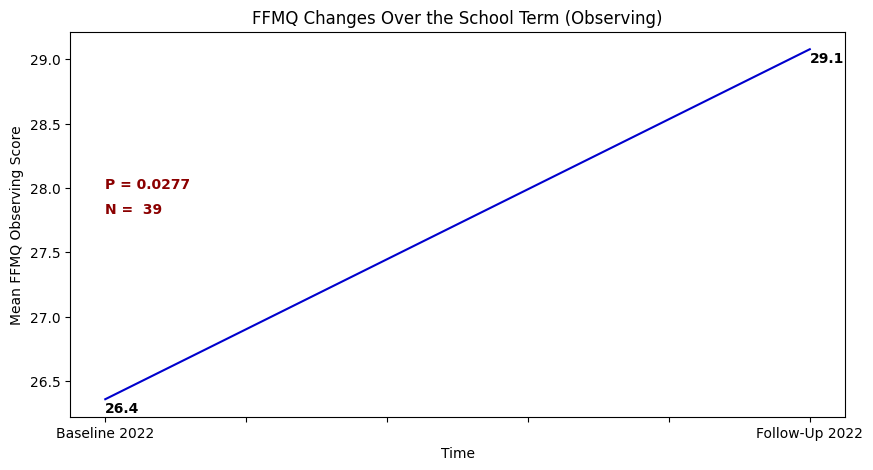

In [44]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=ffmq_observing_grouped, x="timepoint", y="value", ci=None, color="mediumblue"
)
ax.set(xlabel="Time", ylabel="Mean FFMQ Observing Score")
ax.set(title="FFMQ Changes Over the School Term (Observing)")


for x, y in zip(ffmq_observing_grouped["timepoint"], ffmq_observing_grouped["value"]):
    plt.text(
        x=x, y=y - 0.1, s="{:.1f}".format(y), color="black", weight="semibold"
    )  # .set_backgroundcolor('lightblue')

plt.text(
    1,
    28,
    "P = %3.4f" % ffmq_observing_stat.pvalue,
    horizontalalignment="left",
    size="medium",
    color="darkred",
    weight="semibold",
)
plt.text(
    1,
    27.8,
    "N = %3.0f" % len(pre.index),
    horizontalalignment="left",
    size="medium",
    color="darkred",
    weight="semibold",
)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = "Baseline 2022"
labels[6] = "Follow-Up 2022"

ax.set_xticklabels(labels)

### FFMQ Describing

In [45]:
ffmq_describing = pd.melt(
    total, id_vars="timepoint", value_vars="FFMQ Total Describing"
)

In [46]:
ffmq_describing_grouped = (
    ffmq_describing.groupby("timepoint", sort=False).mean().reset_index()
)

In [47]:
ffmq_describing_grouped

,timepoint,value
0,1,27.153846
1,2,29.153846


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_79594/3977240685.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0.8, 0, ''),
 Text(1.0, 0, 'Baseline 2022'),
 Text(1.2000000000000002, 0, ''),
 Text(1.4000000000000001, 0, ''),
 Text(1.6, 0, ''),
 Text(1.8, 0, ''),
 Text(2.0, 0, 'Follow-Up 2022'),
 Text(2.2, 0, '')]

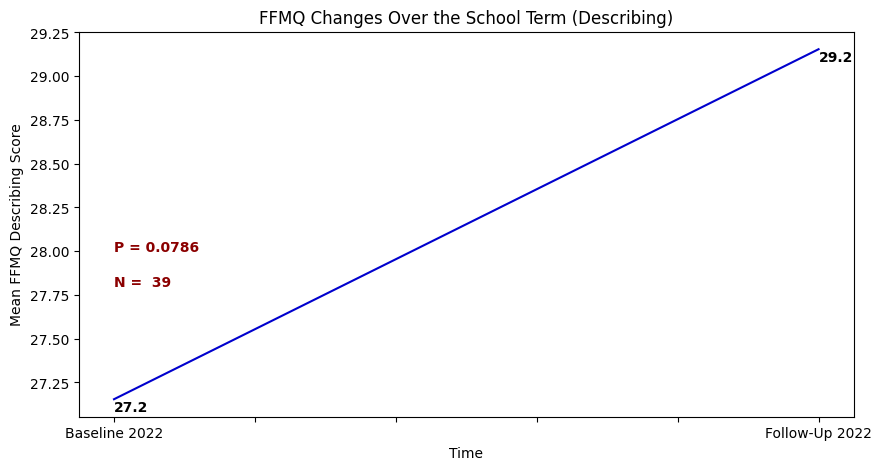

In [48]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=ffmq_describing_grouped, x="timepoint", y="value", ci=None, color="mediumblue"
)
ax.set(xlabel="Time", ylabel="Mean FFMQ Describing Score")
ax.set(title="FFMQ Changes Over the School Term (Describing)")


for x, y in zip(ffmq_describing_grouped["timepoint"], ffmq_describing_grouped["value"]):
    plt.text(
        x=x, y=y - 0.07, s="{:.1f}".format(y), color="black", weight="semibold"
    )  # .set_backgroundcolor('lightblue')

plt.text(
    1,
    28,
    "P = %3.4f" % ffmq_describing_stat.pvalue,
    horizontalalignment="left",
    size="medium",
    color="darkred",
    weight="semibold",
)
plt.text(
    1,
    27.8,
    "N = %3.0f" % len(pre.index),
    horizontalalignment="left",
    size="medium",
    color="darkred",
    weight="semibold",
)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = "Baseline 2022"
labels[6] = "Follow-Up 2022"

ax.set_xticklabels(labels)

### FFMQ Acting

In [49]:
ffmq_acting = pd.melt(total, id_vars="timepoint", value_vars="FFMQ Total Acting")

In [50]:
ffmq_acting_grouped = ffmq_acting.groupby("timepoint", sort=False).mean().reset_index()

In [51]:
ffmq_acting_grouped

,timepoint,value
0,1,23.794872
1,2,26.256410


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_79594/3854650447.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0.8, 0, ''),
 Text(1.0, 0, 'Baseline 2022'),
 Text(1.2000000000000002, 0, ''),
 Text(1.4000000000000001, 0, ''),
 Text(1.6, 0, ''),
 Text(1.8, 0, ''),
 Text(2.0, 0, 'Follow-Up 2022'),
 Text(2.2, 0, '')]

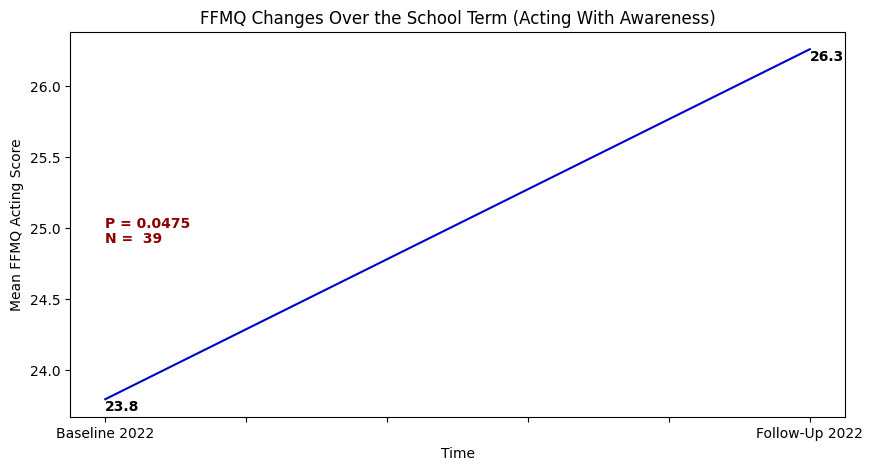

In [52]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=ffmq_acting_grouped, x="timepoint", y="value", ci=None, color="mediumblue"
)
ax.set(xlabel="Time", ylabel="Mean FFMQ Acting Score")
ax.set(title="FFMQ Changes Over the School Term (Acting With Awareness)")


for x, y in zip(ffmq_acting_grouped["timepoint"], ffmq_acting_grouped["value"]):
    plt.text(
        x=x, y=y - 0.08, s="{:.1f}".format(y), color="black", weight="semibold"
    )  # .set_backgroundcolor('lightblue')

plt.text(
    1,
    25,
    "P = %3.4f" % ffmq_acting_stat.pvalue,
    horizontalalignment="left",
    size="medium",
    color="darkred",
    weight="semibold",
)
plt.text(
    1,
    24.9,
    "N = %3.0f" % len(pre.index),
    horizontalalignment="left",
    size="medium",
    color="darkred",
    weight="semibold",
)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = "Baseline 2022"
labels[6] = "Follow-Up 2022"

ax.set_xticklabels(labels)

### FFMQ Nonjudging

In [53]:
ffmq_nonjudging = pd.melt(
    total, id_vars="timepoint", value_vars="FFMQ Total Nonjudging"
)

In [54]:
ffmq_nonjudging_grouped = (
    ffmq_nonjudging.groupby("timepoint", sort=False).mean().reset_index()
)

In [55]:
ffmq_nonjudging_grouped

,timepoint,value
0,1,25.076923
1,2,28.282051


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_79594/4155225546.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0.8, 0, ''),
 Text(1.0, 0, 'Baseline 2022'),
 Text(1.2000000000000002, 0, ''),
 Text(1.4000000000000001, 0, ''),
 Text(1.6, 0, ''),
 Text(1.8, 0, ''),
 Text(2.0, 0, 'Follow-Up 2022'),
 Text(2.2, 0, '')]

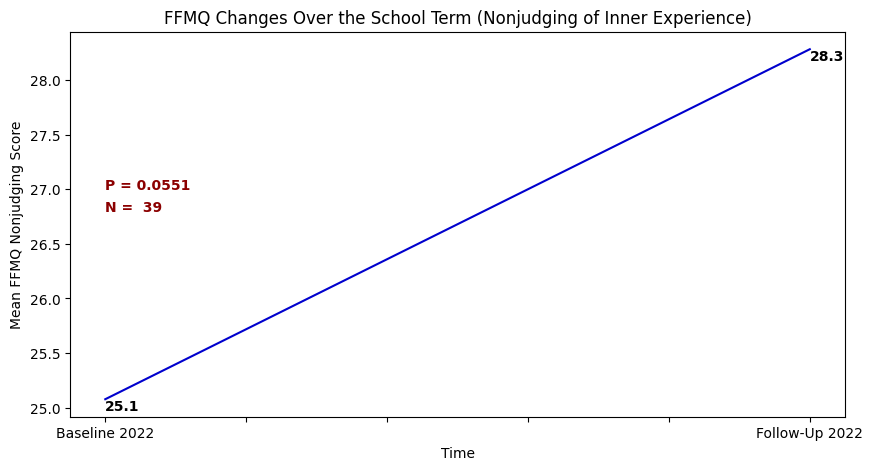

In [56]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=ffmq_nonjudging_grouped, x="timepoint", y="value", ci=None, color="mediumblue"
)
ax.set(xlabel="Time", ylabel="Mean FFMQ Nonjudging Score")
ax.set(title="FFMQ Changes Over the School Term (Nonjudging of Inner Experience)")


for x, y in zip(ffmq_nonjudging_grouped["timepoint"], ffmq_nonjudging_grouped["value"]):
    plt.text(
        x=x, y=y - 0.1, s="{:.1f}".format(y), color="black", weight="semibold"
    )  # .set_backgroundcolor('lightblue')

plt.text(
    1,
    27,
    "P = %3.4f" % ffmq_nonjudging_stat.pvalue,
    horizontalalignment="left",
    size="medium",
    color="darkred",
    weight="semibold",
)
plt.text(
    1,
    26.8,
    "N = %3.0f" % len(pre.index),
    horizontalalignment="left",
    size="medium",
    color="darkred",
    weight="semibold",
)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = "Baseline 2022"
labels[6] = "Follow-Up 2022"

ax.set_xticklabels(labels)

### FFMQ Nonreactivity

In [57]:
ffmq_nonreactivity = pd.melt(
    total, id_vars="timepoint", value_vars="FFMQ Total Nonreactivity"
)

In [58]:
ffmq_nonreactivity_grouped = (
    ffmq_nonreactivity.groupby("timepoint", sort=False).mean().reset_index()
)

In [59]:
ffmq_nonreactivity_grouped

,timepoint,value
0,1,20.333333
1,2,23.666667


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_79594/1062546616.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0.8, 0, ''),
 Text(1.0, 0, 'Baseline 2022'),
 Text(1.2000000000000002, 0, ''),
 Text(1.4000000000000001, 0, ''),
 Text(1.6, 0, ''),
 Text(1.8, 0, ''),
 Text(2.0, 0, 'Follow-Up 2022'),
 Text(2.2, 0, '')]

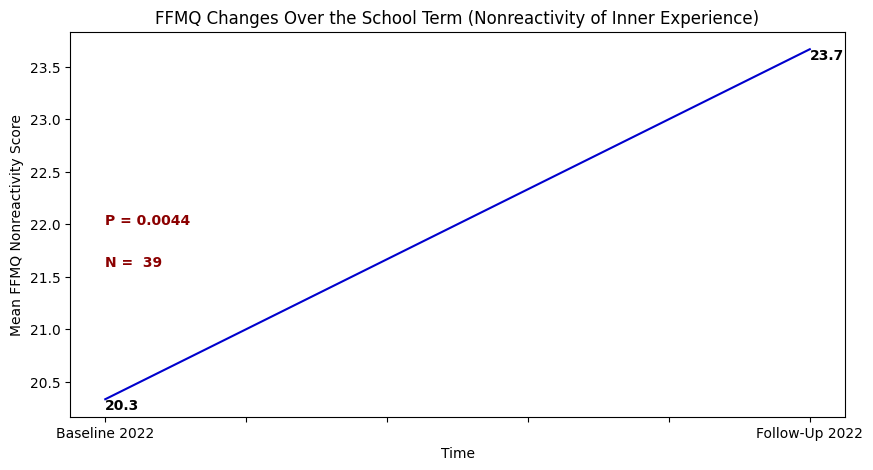

In [60]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=ffmq_nonreactivity_grouped,
    x="timepoint",
    y="value",
    ci=None,
    color="mediumblue",
)
ax.set(xlabel="Time", ylabel="Mean FFMQ Nonreactivity Score")
ax.set(title="FFMQ Changes Over the School Term (Nonreactivity of Inner Experience)")


for x, y in zip(
    ffmq_nonreactivity_grouped["timepoint"], ffmq_nonreactivity_grouped["value"]
):
    plt.text(
        x=x, y=y - 0.1, s="{:.1f}".format(y), color="black", weight="semibold"
    )  # .set_backgroundcolor('lightblue')

plt.text(
    1,
    22,
    "P = %3.4f" % ffmq_nonreactivity_stat.pvalue,
    horizontalalignment="left",
    size="medium",
    color="darkred",
    weight="semibold",
)
plt.text(
    1,
    21.6,
    "N = %3.0f" % len(pre.index),
    horizontalalignment="left",
    size="medium",
    color="darkred",
    weight="semibold",
)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = "Baseline 2022"
labels[6] = "Follow-Up 2022"

ax.set_xticklabels(labels)